Fit a logistic regression model to classify neural events using the fourier data from eeg signals

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
TRAIN_PATH = "train_15000_samples_0_to_10_hz_consensus_1.0_balanced.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[6237.9931640625 49712.37003520317 89155.56441386582 ...
  2.267792243435069 1.967043970315108 'LRDA']
 [647.1039428710938 44332.820042952895 14629.727505954414 ...
  0.6683908794650152 -1.8595569954539009 'LRDA']
 [559.380859375 1962.5900269616395 5804.966856872967 ...
  -2.35181405225194 -2.4620187920265697 'GRDA']
 ...
 [1058.411376953125 5639.339982762933 3967.788930976855 ...
  -2.0293977734959125 -1.915298591753419 'LRDA']
 [1071246.0 461487.3420340419 1132144.7306108498 ... -1.0830085541073258
  -0.537589643082828 'GRDA']
 [422632.0625 270818.7694414556 18905.224865937354 ... -0.912750902212897
  -0.8005658839446281 'GPD']]
(14913, 2421)


In [3]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [4]:
# Test out a number of models
models = []
val_scores = []

solver = 'newton-cg'
penalties = ['none', 'l2'] # l2 is ridge regression
num_iterations = [150, 250, 350, 450]

for penalty in penalties:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter, penalty=penalty, fit_intercept=False)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}, Penalty: {}'.format(solver, iter, penalty))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('\nBest Penalty: {}'.format(penalties[best_model_idx // len(num_iterations)]))
print('Best Iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: none
Training accuracy: 59.79044  Validation accuracy: 53.25%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: none
Training accuracy: 62.38894  Validation accuracy: 54.39%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: none
Training accuracy: 63.99832  Validation accuracy: 54.80%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: none
Training accuracy: 65.25566  Validation accuracy: 54.66%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150, Penalty: l2
Training accuracy: 60.02515  Validation accuracy: 53.66%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 250, Penalty: l2
Training accuracy: 62.86672  Validation accuracy: 54.80%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 350, Penalty: l2
Training accuracy: 64.08215  Validation accuracy: 54.80%


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 450, Penalty: l2
Training accuracy: 65.18022  Validation accuracy: 54.33%
[0.5325285043594903, 0.5439302481556003, 0.5479543930248155, 0.5466130114017438, 0.5365526492287056, 0.5479543930248155, 0.5479543930248155, 0.5432595573440644]

Best Penalty: none
Best Iterations: 350
The test results.... 51.94%


Text(0.5, 1.0, 'Accuracy Score: 0.5194369973190348')

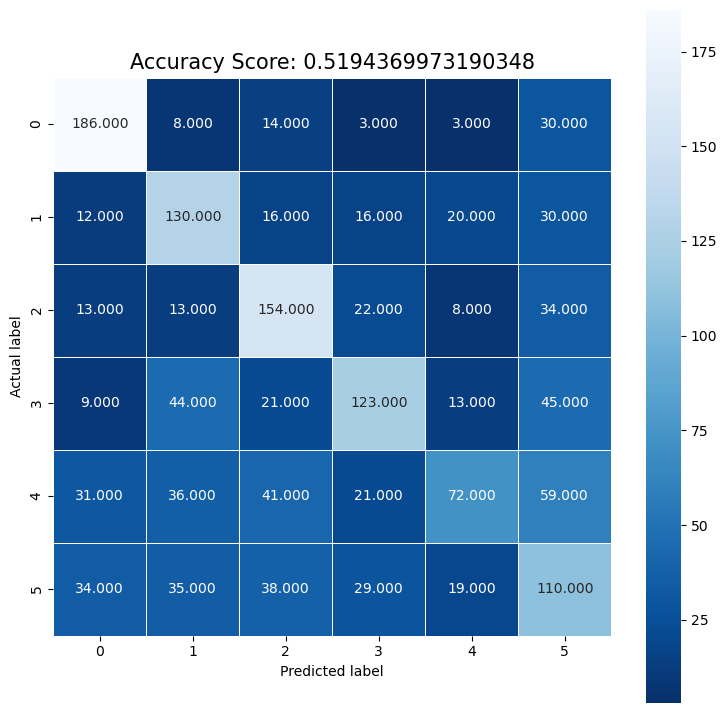

In [5]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)